In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
from torchvision import transforms
import time
from tqdm.autonotebook import tqdm
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np


/var/folders/md/x27g7chd34d0l415_r4nb2jw0000gn/T/ipykernel_67085/3684894571.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [21]:
for name in dir(torchvision.models):
  print(name)

AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights
ConvNeXt_Small_Weights
ConvNeXt_Tiny_Weights
DenseNet
DenseNet121_Weights
DenseNet161_Weights
DenseNet169_Weights
DenseNet201_Weights
EfficientNet
EfficientNet_B0_Weights
EfficientNet_B1_Weights
EfficientNet_B2_Weights
EfficientNet_B3_Weights
EfficientNet_B4_Weights
EfficientNet_B5_Weights
EfficientNet_B6_Weights
EfficientNet_B7_Weights
EfficientNet_V2_L_Weights
EfficientNet_V2_M_Weights
EfficientNet_V2_S_Weights
GoogLeNet
GoogLeNetOutputs
GoogLeNet_Weights
Inception3
InceptionOutputs
Inception_V3_Weights
MNASNet
MNASNet0_5_Weights
MNASNet0_75_Weights
MNASNet1_0_Weights
MNASNet1_3_Weights
MaxVit
MaxVit_T_Weights
MobileNetV2
MobileNetV3
MobileNet_V2_Weights
MobileNet_V3_Large_Weights
MobileNet_V3_Small_Weights
RegNet
RegNet_X_16GF_Weights
RegNet_X_1_6GF_Weights
RegNet_X_32GF_Weights
RegNet_X_3_2GF_Weights
RegNet_X_400MF_Weights
RegNet_X_800MF_Weights
RegNet_X_8GF_Weights
RegNet_Y_128GF_Weights
RegNet_Y_16GF_We

In [2]:
class resNet(nn.Module): 
  def __init__(self, in_channels=3):
    super(resNet, self).__init__()

    # torchvision.models에서 사전훈련된 resnet 모델 가져오기
    self.model = models.resnet50(pretrained=True)

    # self.model.conv1 = nn.Conv2d(
    #     3, 64, kernel_size=7, stride=2, padding=3, bias=False)

    # # 1000개 클래스 대신 10개 클래스로 바꿔주기
    # num_ftrs = self.model.fc.in_features
    # # nn.Linear(in_features, out_features ...)
    # self.model.fc = nn.Linear(num_ftrs, 10)

  def forward(self, x):  # 모델에 있는 foward 함수 그대로 가져오기
    return self.model(x)


my_resnet = resNet()



/Users/jaeiklee/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jaeiklee/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
for name in dir(models.ResNet50_Weights):
  print(name)


IMAGENET1K_V1
IMAGENET1K_V2
__class__
__doc__
__members__
__module__


In [2]:
weights = models.ResNet50_Weights.IMAGENET1K_V1
myResnet50 = models.resnet50(weights)


/Users/jaeiklee/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [3]:

#print(myResnet50)

print(weights.transforms())


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [6]:
from PIL import Image


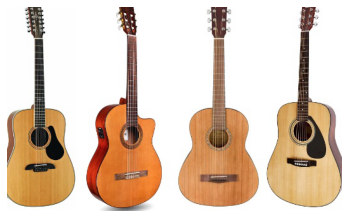

torch.Size([1, 3, 256, 256])
예측 클래스 인덱스: 402
예측 확률: 0.91


In [16]:
# input = torch.randn((16, 3, 224, 224))
image_path = '/Users/jaeiklee/Documents/GitHub/cbnu/projects/laundryStain/TensorFlowDataSet_custom_cat_doc/test/gui.jpg'

data_transform = transforms.Compose([  # Compose : transforms 리스트 구성
    transforms.Resize((256,256)),  # Resize : 입력 이미지의 크기를 지정된 크기로 조정
    transforms.ToTensor(),  # ToTensor : PIL image or numpy.ndarray를 tensor로 바꿈
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

input = Image.open(image_path)  # 이미지 파일 열기

plt.imshow(input)
plt.axis('off')
plt.show()

input = data_transform(input)
input = input.unsqueeze(0)  # 배치 차원 추가
print(input.shape)

myResnet50.eval()

with torch.inference_mode():
    output = myResnet50(input)

probabilities = torch.nn.functional.softmax(output[0], dim=0)
class_idx = torch.argmax(probabilities).item()

# 클래스 인덱스와 확률 출력
print(f"예측 클래스 인덱스: {class_idx}")
print(f"예측 확률: {probabilities[class_idx]:.2f}")

# print(output)
